#**Aula 2 - Demonstração**

###**1. ChatGPT e OpenAI Platform - parte 2**

Continuação da aula 1, mas agora vamos explorar mais alguns métodos e analisar arquivos de PDFs e Imagens com eles.

Para iniciar a aula vamos precisar se autenticar na API da OpenAI Platform.

-----
Preencha o campo **`OPENAI_API_KEY`** com a sua API Key (chave de API) da OpenAI:

In [1]:
OPENAI_API_KEY = "" # @param {"type":"string"}

In [2]:
# Instalação da biblioteca da OpenAI
#!pip install openai==1.101.0 --quiet

In [3]:
import openai
print(openai.__version__)

1.101.0


In [4]:
# Exemplo de geração de texto (simples)
from openai import OpenAI

client = OpenAI(
    api_key = OPENAI_API_KEY
)

response = client.responses.create(
    model = "gpt-4.1-mini",
    input = "Quem é a OpenAI?"
)

print(response.output_text)

A OpenAI é uma empresa de pesquisa em inteligência artificial (IA) fundada em dezembro de 2015 com o objetivo de desenvolver e promover IA de forma segura e benéfica para toda a humanidade. A organização se dedica a criar tecnologias avançadas de IA e realizá-las de maneira transparente, ética e responsável.

A OpenAI é conhecida por desenvolver modelos de linguagem natural, como o GPT (Generative Pre-trained Transformer), que são usados em diversas aplicações, incluindo assistentes virtuais, tradução automática, criação de texto, entre outras. Além disso, a OpenAI realiza pesquisas em outras áreas de IA, como aprendizado por reforço, visão computacional e robótica.

Sua missão principal é garantir que a inteligência artificial geral (IAG), quando for criada, traga benefícios amplos para a sociedade, evitando riscos e promovendo o desenvolvimento seguro dessas tecnologias.

Se quiser, posso fornecer mais detalhes sobre a história, projetos ou a estrutura da OpenAI!


####1.1 - Análise de documentos em PDF

**Analisando um PDF**

- Referência: https://platform.openai.com/docs/guides/pdf-files?api-mode=responses

[Exemplo PDF - **Caso de uso - Marketplace de classificados veículos.pdf**](https://drive.google.com/file/d/1-ZpUOl8OA4lxa8CJ6auT42hSxaF3jclk)



In [8]:
# Download do arquivo de contexto
import os
import gdown

# 1. ID do arquivo no Google Drive
file_id = "1-ZpUOl8OA4lxa8CJ6auT42hSxaF3jclk"

# 2. Nome do arquivo local
local_filename = "Caso de uso - Marketplace de classificados veículos.pdf"

# 3. Baixa o arquivo do Google Drive para a sessão local
gdown.download(f"https://drive.google.com/uc?id={file_id}", local_filename, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-ZpUOl8OA4lxa8CJ6auT42hSxaF3jclk
To: /content/Caso de uso - Marketplace de classificados veículos.pdf
100%|██████████| 95.0k/95.0k [00:00<00:00, 8.14MB/s]


'Caso de uso - Marketplace de classificados veículos.pdf'

In [9]:
# Converte o arquivo em Base64
import base64

PDF_PATH = local_filename
encoded_pdf = base64.b64encode(open(PDF_PATH, 'rb').read()).decode('utf-8')
encoded_pdf

'JVBERi0xLjQKJdPr6eEKMSAwIG9iago8PC9UaXRsZSA8RkVGRjAwNDMwMDYxMDA3MzAwNkYwMDIwMDA2NDAwNjUwMDIwMDA3NTAwNzMwMDZGMDAyMDAwMzEwMDIwMDAyRDAwMjAwMDREMDA2MTAwNzIwMDZCMDA2NTAwNzQwMDcwMDA2QzAwNjEwMDYzMDA2NTAwMjAwMDY0MDA2NTAwMjAwMDYzMDA2QzAwNjEwMDczMDA3MzAwNjkwMDY2MDA2OTAwNjMwMDYxMDA2NDAwNkYwMDczMDAyMDAwNzYwMDY1MDBFRDAwNjMwMDc1MDA2QzAwNkYwMDczPgovUHJvZHVjZXIgKFNraWEvUERGIG0xNDEgR29vZ2xlIERvY3MgUmVuZGVyZXIpPj4KZW5kb2JqCjMgMCBvYmoKPDwvY2EgMQovQk0gL05vcm1hbD4+CmVuZG9iago2IDAgb2JqCjw8L0NBIDEKL2NhIDEKL0xDIDAKL0xKIDAKL0xXIDEuMzMzMzMzMzcKL01MIDEwCi9TQSB0cnVlCi9CTSAvTm9ybWFsPj4KZW5kb2JqCjcgMCBvYmoKPDwvRmlsdGVyIC9GbGF0ZURlY29kZQovTGVuZ3RoIDYwOTA+PiBzdHJlYW0KeJztXeuuJLeN/n+eol/AGkmkbsBgAM8tDrAGNsm8QJDEBhZJsJvNAnn8kNXd51SVyC5JpTN21rEN21PdrZIoind+chdLf3/j6F8Z/eUPf3n6nyeTwvL0/l966C78929/dbn+z99+fHrzK7j8+L9P/HkqeHHOw+Vvf3r64ek3uxGS539oDLs8ojGu//Myxpvv3OXt2zfff/j1R3r+7t37jx+e3n95evMZL74Y4L/w8uWHJ3efK1pjoyvBXUwJJQKmfPnCL/jGRxMCxkx//uPlrbX44d3ly389ZeMwg7Wefn/9wOPygXfGpZLx+XnIy3OXTHGYSnj5IC0fFJNixIL55QOv/SIuH3z6MrS

In [10]:
from openai import OpenAI

client = OpenAI(
    api_key = OPENAI_API_KEY
)

response = client.responses.create(
    model = "gpt-4.1-mini",
    input = [
        {
            "role": "user",
            "content": [
                {
                    "type": "input_file",
                    "filename": f"{local_filename}",
                    "file_data": f"data:application/pdf;base64,{encoded_pdf}",
                },
                {
                    "type": "input_text",
                    "text": "Por favor, gere um resumo breve desse arquivo PDF.",
                },
            ],
        },
    ],
    temperature = 0.7,
)

print(response.output_text)

Claro! Aqui está um resumo breve do conteúdo fornecido:

---

**iAutos - Marketplace de Classificados de Veículos**

O iAutos é uma plataforma brasileira especializada em anúncios de veículos, conectando compradores e vendedores com segurança e transparência. A missão é facilitar negociações reais, oferecendo uma experiência simples, intuitiva e protegida contra fraudes.

**Quem Somos?**  
- Foco exclusivo em veículos, abrangendo automóveis, motos, utilitários, elétricos e híbridos.  
- Proibição de veículos especiais, de competição e ciclomotores.  
- Contato entre usuários ocorre somente via plataforma para garantir segurança.

**Compromissos e Valores**  
- Segurança, transparência, inovação e compromisso com a comunidade.  
- Monitoramento ativo para prevenir fraudes e mau uso.

**Regras e Políticas**  
- Vendedores não podem divulgar contatos pessoais nas descrições.  
- Compradores podem solicitar até 15 contatos diários, limitados em casos de comportamento suspeito.  
- Fraudes 

####1.2 - Análise de imagem

**Analisando uma imagem**
- Referência:  https://platform.openai.com/docs/guides/images-vision?api-mode=responses#analyze-images

##### **1.2.1 - Análise com geração de texto simples**

[Imagem de um carro - Golf GTI](https://drive.google.com/file/d/1qkAEglUpfafQnNXPek3QS7Bv-bMcnWsy) (vulgo --> Golferaaaa!!!)

In [11]:
# Link direto da imagem (no formato para download)
image_url = "https://drive.google.com/uc?export=download&id=1qkAEglUpfafQnNXPek3QS7Bv-bMcnWsy"
image_url

'https://drive.google.com/uc?export=download&id=1qkAEglUpfafQnNXPek3QS7Bv-bMcnWsy'

In [12]:
# Analisando a imagem direto da URL
from openai import OpenAI

client = OpenAI(
    api_key = OPENAI_API_KEY
)

response = client.responses.create(
    model = "gpt-4.1-mini",
    input = [{
        "role": "user",
        "content": [
            {"type": "input_text", "text": "O que tem nessa imagem?"},
            {
                "type": "input_image",
                "image_url": image_url,
            },
        ],
    }],
)

print(response.output_text)

A imagem mostra a traseira de um carro branco em movimento, especificamente um Volkswagen Golf GTI. O carro está em uma estrada com faixa de rolamento visível e possui detalhes como as luzes traseiras acesas, escapamento duplo, e vidro traseiro escurecido.


In [13]:
print(response.to_json())

{
  "id": "resp_68b5de9531208191ac03e47ef8093955000a29030af8a3b8",
  "created_at": 1756749463.0,
  "error": null,
  "incomplete_details": null,
  "instructions": null,
  "metadata": {},
  "model": "gpt-4.1-mini-2025-04-14",
  "object": "response",
  "output": [
    {
      "id": "msg_68b5de9a9a1081919f5ff1c2101d2a99000a29030af8a3b8",
      "content": [
        {
          "annotations": [],
          "text": "A imagem mostra a traseira de um carro branco em movimento, especificamente um Volkswagen Golf GTI. O carro está em uma estrada com faixa de rolamento visível e possui detalhes como as luzes traseiras acesas, escapamento duplo, e vidro traseiro escurecido.",
          "type": "output_text",
          "logprobs": []
        }
      ],
      "role": "assistant",
      "status": "completed",
      "type": "message"
    }
  ],
  "parallel_tool_calls": true,
  "temperature": 1.0,
  "tool_choice": "auto",
  "tools": [],
  "top_p": 1.0,
  "background": false,
  "max_output_tokens": null,

In [14]:
response.output_text

'A imagem mostra a traseira de um carro branco em movimento, especificamente um Volkswagen Golf GTI. O carro está em uma estrada com faixa de rolamento visível e possui detalhes como as luzes traseiras acesas, escapamento duplo, e vidro traseiro escurecido.'

**Golf GTI**

<img src="https://drive.google.com/uc?export=download&id=1qkAEglUpfafQnNXPek3QS7Bv-bMcnWsy" width="300" height="200">

**ATENÇÃO: Requisitos de entrada de imagem**

https://platform.openai.com/docs/guides/images-vision?api-mode=responses#image-input-requirements

As imagens de entrada devem atender aos seguintes requisitos para serem usadas na API.

- **Tipos de arquivo suportados:** PNG (.png) - JPEG (.jpeg e .jpg) - WEBP (.webp) - GIF não animado (.gif)
- **Limites de tamanho:** Até 50 MB de tamanho total de payload por solicitação: - Até 500 entradas de imagem individuais por solicitação:

##### **1.2.2 - Análise com formatação de saída**

---

**Mais um exemplo, mas agora vamos carregar a imagem, controlar o tamanho dela e formatar a saída da análise.**

**Upload da imagem:**

Teste alguma imagem ou faça o download dessa - [**imagem-rosto**](https://drive.google.com/file/d/1Novpb1kXfrXaPu2gWGanuzFEAYKBYGe_) - [url de download](https://drive.google.com/uc?export=download&id=1Novpb1kXfrXaPu2gWGanuzFEAYKBYGe_)

In [15]:
import os
import base64
from PIL import Image
from google.colab import files

In [16]:
# Função para redimensionar imagens
def resized_img(file_name: str) -> str:
    """ Função para redimensionar imagens grandes
    """
    img = Image.open(file_name)
    width, height = img.size
    if width <= 600 or height <= 400:
        return file_name

    resized_img = img.resize((600, 400))
    file_name_output = "resized_" + file_name
    resized_img.save(file_name_output)
    print(f"Image resized to 600x400 and saved as '{file_name_output}'")
    return file_name_output

Saving imagem2-homem.jpg to imagem2-homem.jpg
Arquivo recebido "imagem2-homem.jpg" com 13626 bytes
Arquivo redimensionado "imagem2-homem.jpg"


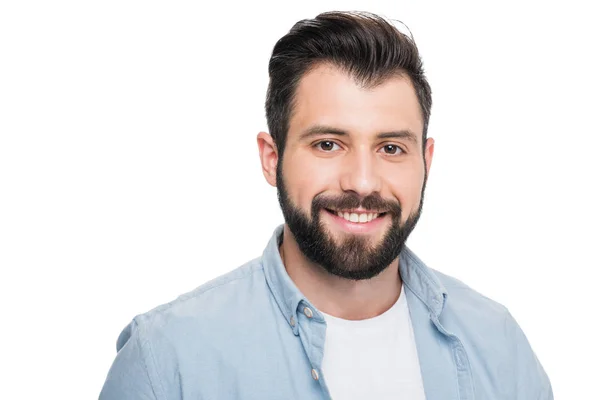

In [17]:
# Célula para fazer Upload de um arquivo de imagem
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'Arquivo recebido "{fn}" com {len(uploaded[fn])} bytes')
  file_resized = resized_img(fn)
  print(f'Arquivo redimensionado "{file_resized}"')

with Image.open(file_resized) as img:
  display(img)

A gente transforma o arquivo binário (.jpg, .png, etc.) em uma string codificada e depois essa string é enviada diretamente na requisição da API.

In [18]:
# Converte a imagem para Base64
IMAGE_PATH = file_resized
encoded_image = base64.b64encode(open(IMAGE_PATH, 'rb').read()).decode('ascii')
encoded_image

'UklGRjI1AABXRUJQVlA4ICY1AABQAQGdASpYApABPlEokEYjoqGko/MJWJAKCWduvnXuJXIFPnjI3PtF7mvF8v7lGjgP3Pc+n/caear9pvVO9P39l37j0AOmJn5XT39Rlg+LupN4F51/8vwl4Cj3P31mTX//5HnD4gvmV/5fFB/J+oV5Rv/L5Xf271EumSMymIBARbmACAhJamtg25DuzUCqLjHT3ZuGxh1fA+Pb5gw8AgItzABARbmACAi3L/hKP/ZFJ1auV2RHSezbxIByjO9eZshgPopwXg5eL+CoTAkkQRVRyoBz86CEXtDZ/Os0SFMAEBFuYAICLcv9ojD/PDhTdhlvAYZsc3r86Gz1DCsKThhhB8rl1acFutSs7M01VOQyMOCt2BeLiSPy1dV5cByEE6t76pQtzABARbmACAi3MAD0oKr9IzStpVmnLgKOsf/Fn8W/biqO+5fOwtPfdjowOj5SG9HVLQPec4IwACmaSOjorpmsuCcKQEvggybaS+wytzABARbmACAi3MAD0YlGX0sMza/MmE3KU9X+uSiAuW9Up5wHH7INXx5A3T/NlfXaIeK06d9IApkIm0/PZZtMzyfyRd6IfqLrRE0BC/hF2Z4CLcwAQEW5gAgB23e4R/0uBFLpAJ7OiUXSBzoDNBLdJ2lMSzOOF1zgQpM4X5daGxopgEHUwUHXI7c+MiMat3Zbq29GwtzABARbmACAi3L/ZdcLYh4GEng+QFZYQKNuLOh0vdxWBp5V8kbW8moDtS4YEw6vnlyes6K/hlBLu4vQpgAgItzABARbmAAi0i16gveYgHiwS+4uEn1TLFnLd2N+XnCyqCB9osJ9NLobEgdYLVYjQzoXH+D9W4I3x4+cQEW5gAgItzABARbkhWZV5YcraSKunOxZPLbi/JYny0RgUCK+zjOzx2zOCvmc1p/1JzcnjGjl8uhFDKMthuc8q8bc1PBjkG31xxILrhvcOzRIUwAQEW5gAgAZSki

In [19]:
#base64.b64encode(open(IMAGE_PATH, 'rb').read()).decode("utf-8")

API da OpenAI não consegue **“abrir”** imagens que estão privadas (locais), por isso temos que transformar em um formato que ela entenda, no final qualquer arquivo para a máquina é transformado em binários (números).

https://platform.openai.com/docs/guides/images-vision?api-mode=responses&format=base64-encoded#image-input-requirements

In [20]:
# Exemplo do template de saída
{"faces":[{"gender":"male/female", "age": 50}], "description": "Descrição geral da pessoa ou da imagem."}


{'faces': [{'gender': 'male/female', 'age': 50}],
 'description': 'Descrição geral da pessoa ou da imagem.'}

[{'role': 'developer',
  'content': [{'type': 'input_text',
    'text': 'Analise a imagem e descreva o conteúdo da imagem conforme o formato em JSON solicitado.\n                    Deve conter as tags \'gender\' e \'age\' (em anos) para cada pessoa presente na imagem.\n                    EXEMPLO DE RESPOSTA {"faces":[{"gender":"male/female", "age": 50}], "description": "Descrição geral da pessoa ou da imagem."}\n                    Não adicione explicações, responda **apenas** com o JSON.'}]},
 {'role': 'user',
  'content': [{'type': 'input_text', 'text': 'Segue a imagem: '},
   {'type': 'input_image',
    'image_url': ''}]}]
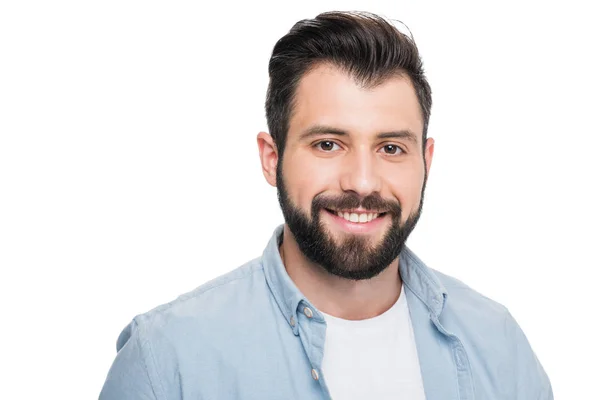

In [21]:
# Prompt mais estruturado
prompt = [
    {
        "role": "developer",
        "content": [
            {
                "type": "input_text",
                "text": """Analise a imagem e descreva o conteúdo da imagem conforme o formato em JSON solicitado.
                    Deve conter as tags 'gender' e 'age' (em anos) para cada pessoa presente na imagem.
                    EXEMPLO DE RESPOSTA {"faces":[{"gender":"male/female", "age": 50}], "description": "Descrição geral da pessoa ou da imagem."}
                    Não adicione explicações, responda **apenas** com o JSON."""
                  }
            ]
        },
    {
        "role": "user",
        "content": [
            {
                "type": "input_text",
                "text": "Segue a imagem: "
                },
            {
                "type": "input_image",
                "image_url": f"data:image/jpeg;base64,{encoded_image}",
                },
            ],
        }
    ]

prompt

In [22]:
from openai import OpenAI

client = OpenAI(
    api_key = OPENAI_API_KEY
)

response = client.responses.create(
    model = "gpt-4.1-mini",
    temperature = 0.7,
    input = prompt
)

print(response.output_text)

{"faces":[{"gender":"male","age":30}],"description":"Homem jovem sorridente com barba e cabelo curto, vestindo camiseta branca e camisa azul clara aberta, em fundo branco."}


In [23]:
print(f"Retorno completo do LLM: \n{response.to_json()}")

Retorno completo do LLM: 
{
  "id": "resp_68b5dece0344819f91e113873ddd690e04fa934dca4a9ed3",
  "created_at": 1756749518.0,
  "error": null,
  "incomplete_details": null,
  "instructions": null,
  "metadata": {},
  "model": "gpt-4.1-mini-2025-04-14",
  "object": "response",
  "output": [
    {
      "id": "msg_68b5dece89bc819fa1bb40b2664541f604fa934dca4a9ed3",
      "content": [
        {
          "annotations": [],
          "text": "{\"faces\":[{\"gender\":\"male\",\"age\":30}],\"description\":\"Homem jovem sorridente com barba e cabelo curto, vestindo camiseta branca e camisa azul clara aberta, em fundo branco.\"}",
          "type": "output_text",
          "logprobs": []
        }
      ],
      "role": "assistant",
      "status": "completed",
      "type": "message"
    }
  ],
  "parallel_tool_calls": true,
  "temperature": 0.7,
  "tool_choice": "auto",
  "tools": [],
  "top_p": 1.0,
  "background": false,
  "max_output_tokens": null,
  "max_tool_calls": null,
  "previous_respon

In [24]:
import json

# Variável com a parte mais importante do retorno
response_json = json.loads(response.to_json())["output"][0]['content'][0]['text']
type(response_json)
display(response_json)

'{"faces":[{"gender":"male","age":30}],"description":"Homem jovem sorridente com barba e cabelo curto, vestindo camiseta branca e camisa azul clara aberta, em fundo branco."}'

In [25]:
response_json = json.loads(response.output_text)
type(response_json)

dict

In [26]:
display(response_json)

{'faces': [{'gender': 'male', 'age': 30}],
 'description': 'Homem jovem sorridente com barba e cabelo curto, vestindo camiseta branca e camisa azul clara aberta, em fundo branco.'}

In [27]:
response_json['faces'][0]

{'gender': 'male', 'age': 30}

---
Forçando a formatação de saída por função:

- Referência: https://platform.openai.com/docs/guides/structured-outputs


In [29]:
from pydantic import BaseModel
from openai import OpenAI

class Face(BaseModel):
    gender: str
    age: int

class ImageAnalysis(BaseModel):
    faces: list[Face]
    description: str

client = OpenAI(
    api_key = OPENAI_API_KEY
    )

response = client.responses.parse(
    model = "gpt-4.1-mini",
    input = prompt,
    text_format = ImageAnalysis,
    )

print(response.output_parsed)

faces=[Face(gender='male', age=30)] description='Um homem jovem de cabelos escuros e barba, sorrindo, vestindo uma camisa azul clara sobre uma camiseta branca, com fundo branco.'


In [30]:
response_json = response.output_parsed.model_dump()
print(response_json)

{'faces': [{'gender': 'male', 'age': 30}], 'description': 'Um homem jovem de cabelos escuros e barba, sorrindo, vestindo uma camisa azul clara sobre uma camiseta branca, com fundo branco.'}


In [31]:
response_parsed = response.output_parsed

print(response_parsed.description)        # descrição geral da imagem (string)
for face in response_parsed.faces:
    print(face.gender)           # gênero da face (str)
    print(face.age)              # idade (int)

Um homem jovem de cabelos escuros e barba, sorrindo, vestindo uma camisa azul clara sobre uma camiseta branca, com fundo branco.
male
30


### **Desafio 1**

Com base no contexto do Caso de Uso - Marketplace de classificados veículos apresentado na Aula 1...

Agora vamos fazer algo semelhante da aula anterior, porém vamos analisar algumas imagens de veículos publicados e tentar identificar se elas estão infringindo alguma política de uso e publicação.


- 1.1 - Analise a [imagem 1](https://drive.google.com/file/d/1YJG2G-yHbi0V71VMHvh8s0LOX2wZFzhA) e valide qual política de uso ela infringe.
- 1.2 - Analise a [imagem 2](https://drive.google.com/file/d/1w9Znh2GG-kqI-o1mRIJyCcr8GSaV4itS) e valide qual política de uso ela infringe.
- 1.3 - Crie uma função que analise uma imagem e estruture uma resposta em JSON, com as seguintes tags:
  - 'flg_suspeito' - suspeito/não suspeito.
  - 'comentario' - breve comentário sobre a análise feita sobre o caso.
  - 'descricao' - breve descrição sobre a imagem.


In [ ]:
# Resposta

##**2. LangChain**

Até aqui usamos diretamente o framework da API da OpenAI, mas podemos criar uma aplicação usando uma estrutura mais padronizada que independente do serviço de LLM que estamos usando, ou seja, podemos mesclar os serviços e modelos de acordo com a estratégia que queremos para resolver um problema.

A biblioteca **`LangChain`** nos permite fazer isso.

###**2.1. O que é [LangChain](https://python.langchain.com/docs/introduction/)?**


LangChain é uma framework para desenvolvimento de aplicativos baseados em LLMs (modelos de linguagem) de forma modular, componível, rastreável e produtiva.

O LangChain permite organizar a aplicação em blocos (prompts, modelos, parsers, memórias, ferramentas, cadeias/“chains”, vetores e recuperadores/RAG), através do **LCEL (LangChain Expression Language)**, que é uma forma de composição declarativa de encadear componetes (blocos) em uma "cadeia" de execução.
<br>
<br>

O que podemos fazer com o LangChain?
- Orquestrar modelos (OpenAI/Azure, Gemini, Claude, Bedrock, etc.).
- Compor pipelines: prompt → LLM → parser → pós-processamento → ferramentas (funções) → respostas.
- RAG: conectar seus dados (vector stores) aos modelos.
- Agentes: LLM que decide quando/como chamar ferramentas externas.
- Observabilidade e avaliação com LangSmith, nativamente integrado.
<br>
<br>

O LangChan é composto por algumas ferramentas:
- O próprio LangChain que é o framework de desenvolvimento.
- [LangGraph](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/) é uma biblioteca focada em fluxos baseados em grafos de estado: você define nós (funções/modelos), estado (mensagens, variáveis) e arestas (condições/loop).
- [LangSmith](https://docs.smith.langchain.com/) é uma plataforma para a criação de aplicações de LLM de nível de produção. Ela permite que você monitore e avalie sua aplicação de perto, para que possa entregá-la com rapidez e confiança.
---

Documentações/Referências:
- [Site oficial LangChain](https://www.langchain.com/)
- [Introdução ao LangChain](https://python.langchain.com/docs/introduction/)
- [LangChain Python API Reference](https://python.langchain.com/api_reference/index.html)
- [Chat Models (Modelos de Chat)](https://python.langchain.com/docs/integrations/chat/)
- [Modelos de linguagem - LLMs compatíveis](https://python.langchain.com/docs/integrations/llms/)
- [ChatPromptTemplate](https://python.langchain.com/api_reference/core/prompts/langchain_core.prompts.chat.ChatPromptTemplate.html)
- [LLMChain](https://python.langchain.com/api_reference/langchain/chains/langchain.chains.llm.LLMChain.html)

###**2.2. LangChain com OpenAI**

Vamos explorar os servicos da OpenAI, porém via LangChain que padroniza o uso de diferentes LLMs em um único framework.

Documentações/Referências:
- [LangChain OpenAI](https://python.langchain.com/docs/integrations/llms/openai/)
- [ChatOpenAI](https://python.langchain.com/docs/integrations/chat/openai/)

In [32]:
!pip install langchain==0.3.27 langchain-openai --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 4.7 MB/s eta 0:00:00


In [33]:
import langchain
print(langchain.__version__)

0.3.27


In [34]:
import os
OPENAI_API_KEY = "" # @param {"type":"string"}

# Coloquei em uma variável de ambiente também, isso permite ocultar o parâmetro api_key na chamada do LLM (opcional)
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

Configuração do modelo de linguagem (LLM), no caso vamos usar o modelo da família gpt-4.1 da OpenAI, mas podederia ser outro.

In [35]:
from langchain_openai import ChatOpenAI

### MOTOR DO LANGCHAIN ###
# Instância com o modelo de linguagem (LLM)
llm = ChatOpenAI(
    api_key = OPENAI_API_KEY,           # Chave da API da OpenAI
    model = "gpt-4.1-mini",             # ou "o4-mini" (raciocínio)
    temperature = 0.5,                  # mais determinístico
)
### MOTOR DO LANGCHAIN ###

Aqui estão mais alguns parâmetros que podemos utilizar:

---
| Parâmetro | Função |
| --------- | ------ |
| **`model`** | Nome do modelo a ser usado. Exemplos: `"gpt-4.1-mini"`, `"o4-mini"`, `"gpt-4o"`, `"gpt-4o-mini"`. Modelos com `-mini` são mais baratos/rápidos, e os com `o4` ou `gpt-4.1` são mais sofisticados no raciocínio. |
| **`use_responses_api`** | Booleano. Se `True`, usa a nova **Responses API** da OpenAI no lugar da API antiga de `chat.completions`. A Responses API é mais flexível (suporta *structured outputs*, *function/tool calling*, *JSON Schema*, *multimodal*, etc.) e é o padrão recomendado para novos projetos. |
| **`output_version`** | Define a “versão” do formato de saída ao usar a Responses API. `"responses/v1"` é a versão atual, que retorna objetos mais organizados (ex.: `.output_text`, `.output_parsed`, `.content`). |
| **`temperature`** | Controla a aleatoriedade da geração de resposta do modelo: <br>- **0.0 a 0.3** → mais determinístico. <br>- **0.5** → mais criativo, mas ainda coerente. <br>- **0.7+** → muito criativo, maior risco de alucinação. |
| **`max_tokens`** | Define o **número máximo de tokens de saída** gerados pelo modelo (não é o mesmo que o limite total do modelo, que inclui entrada + saída). Útil para limitar respostas muito longas. |
| **`timeout`**  | Tempo máximo (em segundos) que a chamada ao modelo pode levar antes de lançar um erro. Evita travamentos ou esperas indefinidas em cenários de rede instável. |
| **`api_key`** | Chave da API a ser usada. Pode ser definida diretamente no construtor ou via variáveis de ambiente (`OPENAI_API_KEY` ou equivalente para Azure). |
| **`base_url`** | URL base do endpoint da API. Necessário, por exemplo, para integrar com Azure OpenAI, onde você aponta para o endpoint do seu recurso (`https://SEU-RECURSO.openai.azure.com`). |
| **`default_headers`** | Permite enviar **headers HTTP extras** junto com a requisição. Útil para cenários corporativos que exigem autenticação adicional ou rastreamento de requisições. |
| **`max_retries`**  | Número máximo de tentativas automáticas em caso de erro de rede, timeouts ou respostas inválidas. Ajuda a tornar a aplicação mais resiliente a falhas transitórias.  |
| **`streaming`**  | Booleano. Se `True`, ativa o **streaming token a token** da resposta, permitindo exibir o texto ao usuário em tempo real conforme ele é gerado. Ideal para interfaces de chat. |
| **`model_kwargs`** | Dicionário com parâmetros extras suportados pelo modelo. Exemplos: <br>• `stop`: lista de strings que interrompem a geração.<br>• `logprobs`: retorna probabilidades das próximas tokens.<br>• `top_p`: *nucleus sampling* (0 a 1, controla diversidade).<br>• `presence_penalty` e `frequency_penalty`: penalizam repetições para incentivar diversidade na resposta. |



---

#### 2.2.1. Geração de texto:

Chamada simples

In [36]:
response = llm.invoke("O que é LangChain?")

print(response.text())

LangChain é uma biblioteca de código aberto projetada para facilitar a criação de aplicações que utilizam modelos de linguagem (LLMs) de forma mais eficiente e integrada. Ela oferece ferramentas e componentes para construir pipelines complexos que combinam LLMs com outras fontes de dados, lógica de negócios, e funcionalidades externas, como APIs, bancos de dados, e ferramentas de busca.

Em resumo, LangChain ajuda desenvolvedores a:

- Criar cadeias (chains) de chamadas a modelos de linguagem, permitindo que o output de um passo seja o input do próximo.
- Integrar modelos de linguagem com dados externos, como documentos, bases de conhecimento, ou APIs.
- Construir agentes que podem tomar decisões baseadas em múltiplas fontes e executar ações específicas.
- Gerenciar prompts de forma estruturada e reutilizável.

É muito utilizada para desenvolver aplicações como chatbots avançados, sistemas de question answering, automação de tarefas baseadas em linguagem natural, entre outros casos que

Estruturando um prompt

In [37]:
prompt = [{
    "role": "user",
    "content": [
        {
            "type": "text",
            "text": "O que é LangChain?",
        }
    ],
}]

response = llm.invoke(prompt)

print(response.text())

LangChain é uma biblioteca de código aberto projetada para facilitar a criação de aplicações que utilizam modelos de linguagem (como o GPT) de forma mais eficiente e poderosa. Ela oferece uma estrutura para construir fluxos de trabalho complexos que envolvem modelos de linguagem, integrando-os com outras fontes de dados, ferramentas e APIs.

Com LangChain, desenvolvedores podem criar aplicações que vão além de simples chamadas a modelos de linguagem, incluindo funcionalidades como:

- **Encadeamento de chamadas a modelos**: combinar múltiplas chamadas a modelos de linguagem para realizar tarefas mais elaboradas.
- **Integração com bases de dados e documentos**: permitir que o modelo acesse informações externas para responder perguntas ou gerar conteúdo baseado em dados específicos.
- **Memória**: manter contexto ao longo de interações, possibilitando conversas mais naturais e coerentes.
- **Uso de agentes**: criar agentes que utilizam modelos de linguagem para tomar decisões, interagir

Mas professor, você falou que o LangChain padroniza a chamada para o LLM, certo?

In [40]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Monta um template de prompt — mensagens estruturadas (system/human/ia)
prompt = ChatPromptTemplate.from_messages([
    ("system", "Você é um assistente técnico e objetivo."),
    ("human", "Explique o que é LangChain em 3 tópicos."),
])

# Parser — converte a resposta em string “limpa”
parser = StrOutputParser()

In [41]:
# Cadeia LCEL — prompt -> modelo -> parser
chain = prompt | llm | parser
# chain = prompt | llm ## Testem sem o parser para ver como fica a estrutura de saída.

response = chain.invoke({}) # .invoke para um único item
response

'1. **Framework para aplicações com LLMs:** LangChain é uma biblioteca que facilita a construção de aplicações usando grandes modelos de linguagem (LLMs), integrando-os com outras fontes de dados e ferramentas.\n\n2. **Encadeamento de componentes:** Permite criar fluxos de trabalho complexos combinando prompts, modelos, agentes, memória e fontes externas, tornando a interação com LLMs mais estruturada e eficiente.\n\n3. **Suporte a diversas integrações:** Oferece conectores para bases de dados, APIs, motores de busca e outras plataformas, ampliando as possibilidades de uso dos modelos de linguagem em diferentes contextos.'

In [42]:
print(response)

1. **Framework para aplicações com LLMs:** LangChain é uma biblioteca que facilita a construção de aplicações usando grandes modelos de linguagem (LLMs), integrando-os com outras fontes de dados e ferramentas.

2. **Encadeamento de componentes:** Permite criar fluxos de trabalho complexos combinando prompts, modelos, agentes, memória e fontes externas, tornando a interação com LLMs mais estruturada e eficiente.

3. **Suporte a diversas integrações:** Oferece conectores para bases de dados, APIs, motores de busca e outras plataformas, ampliando as possibilidades de uso dos modelos de linguagem em diferentes contextos.


Outros parsers importantes no LangChain:
- **`StrOutputParser`** --> força uma saída com apenas uma String (texto).
- **`PydanticOutputParser`** --> força uma saída em formato JSON validado por modelo Pydantic.
- **`StructuredOutputParser`** --> define o formato esperado via JSON Schema.
- **`DatetimeOutputParser`** --> extrai e converte datas.
- **`CommaSeparatedListOutputParser`** --> transforma texto em lista de strings.
- **`JsonOutputParser`** --> força o LLM a retornar JSON válido.

#### 2.2.2. Análise de imagem (input file) + Saída estruturada

Referências / Documentações:
- [How to pass multimodal data to models](https://python.langchain.com/docs/how_to/multimodal_inputs/)


Agora vamos usar o parser com o **`StructuredOutputParser`** que formata em um schema JSON, pois já vimos um exemplo com o **`Pydantic`**, certo?

**Upload da imagem:**

Teste alguma imagem ou faça o download dessa - [**imagem-rosto**](https://drive.google.com/file/d/1Novpb1kXfrXaPu2gWGanuzFEAYKBYGe_) - [url de download](https://drive.google.com/uc?export=download&id=1Novpb1kXfrXaPu2gWGanuzFEAYKBYGe_)

In [11]:
import os
import base64
from PIL import Image
from google.colab import files

In [12]:
# Função para redimensionar imagens
def resized_img(file_name: str) -> str:
    """ Função para redimensionar imagens grandes
    """
    img = Image.open(file_name)
    width, height = img.size
    if width <= 600 or height <= 400:
        return file_name

    resized_img = img.resize((600, 400))
    file_name_output = "resized_" + file_name
    resized_img.save(file_name_output)
    print(f"Image resized to 600x400 and saved as '{file_name_output}'")
    return file_name_output

Saving imagem2-homem.jpg to imagem2-homem.jpg
Arquivo recebido "imagem2-homem.jpg" com 13626 bytes
Arquivo redimensionado "imagem2-homem.jpg"


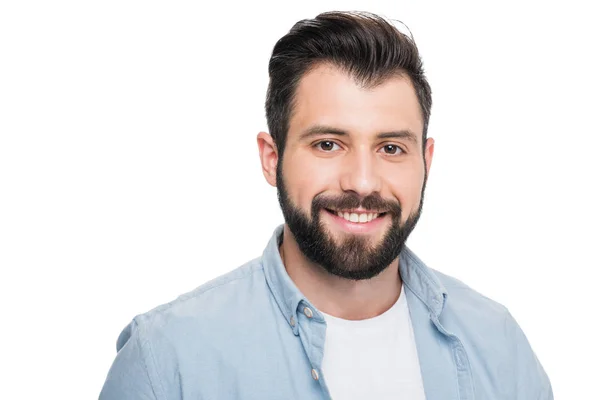

In [13]:
# Célula para fazer Upload de um arquivo de imagem
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'Arquivo recebido "{fn}" com {len(uploaded[fn])} bytes')
  file_resized = resized_img(fn)
  print(f'Arquivo redimensionado "{file_resized}"')

with Image.open(file_resized) as img:
  display(img)

In [43]:
# Converte a imagem para Base64
IMAGE_PATH = file_resized
encoded_image = base64.b64encode(open(IMAGE_PATH, 'rb').read()).decode('utf-8')
encoded_image

'UklGRjI1AABXRUJQVlA4ICY1AABQAQGdASpYApABPlEokEYjoqGko/MJWJAKCWduvnXuJXIFPnjI3PtF7mvF8v7lGjgP3Pc+n/caear9pvVO9P39l37j0AOmJn5XT39Rlg+LupN4F51/8vwl4Cj3P31mTX//5HnD4gvmV/5fFB/J+oV5Rv/L5Xf271EumSMymIBARbmACAhJamtg25DuzUCqLjHT3ZuGxh1fA+Pb5gw8AgItzABARbmACAi3L/hKP/ZFJ1auV2RHSezbxIByjO9eZshgPopwXg5eL+CoTAkkQRVRyoBz86CEXtDZ/Os0SFMAEBFuYAICLcv9ojD/PDhTdhlvAYZsc3r86Gz1DCsKThhhB8rl1acFutSs7M01VOQyMOCt2BeLiSPy1dV5cByEE6t76pQtzABARbmACAi3MAD0oKr9IzStpVmnLgKOsf/Fn8W/biqO+5fOwtPfdjowOj5SG9HVLQPec4IwACmaSOjorpmsuCcKQEvggybaS+wytzABARbmACAi3MAD0YlGX0sMza/MmE3KU9X+uSiAuW9Up5wHH7INXx5A3T/NlfXaIeK06d9IApkIm0/PZZtMzyfyRd6IfqLrRE0BC/hF2Z4CLcwAQEW5gAgB23e4R/0uBFLpAJ7OiUXSBzoDNBLdJ2lMSzOOF1zgQpM4X5daGxopgEHUwUHXI7c+MiMat3Zbq29GwtzABARbmACAi3L/ZdcLYh4GEng+QFZYQKNuLOh0vdxWBp5V8kbW8moDtS4YEw6vnlyes6K/hlBLu4vQpgAgItzABARbmAAi0i16gveYgHiwS+4uEn1TLFnLd2N+XnCyqCB9osJ9NLobEgdYLVYjQzoXH+D9W4I3x4+cQEW5gAgItzABARbkhWZV5YcraSKunOxZPLbi/JYny0RgUCK+zjOzx2zOCvmc1p/1JzcnjGjl8uhFDKMthuc8q8bc1PBjkG31xxILrhvcOzRIUwAQEW5gAgAZSki

Análise da imagem de forma simples

In [44]:
prompt = [{
    "role": "user",
    "content": [
        {
            "type": "text",
            "text": "Descreva essa imagem e informe qual a idade e sexo das pessoas: ",
        },
        {
            "type": "image",
            "source_type": "base64",
            "data": encoded_image,
            "mime_type": "image/jpeg",
        },
    ],
}]

response = llm.invoke(prompt)

print(response.text())

A imagem mostra um homem com barba e cabelo escuro, sorrindo para a câmera. Ele está usando uma camiseta branca e uma camisa azul clara por cima. A idade aproximada dele parece estar entre 25 e 35 anos.


Análise da imagem estruturando a saída

In [45]:
# Monta schema de saída em JSON
from langchain.output_parsers import StructuredOutputParser, ResponseSchema

# Formatação do schema
response_schemas = [
    ResponseSchema(
        name="faces",
        description="Lista de pessoas na imagem com gênero e idade. Ex: [{\"gender\": \"male/female\", \"age\": 50}]"
    ),
    ResponseSchema(
        name="description",
        description="Descrição geral da(s) pessoa(s) e/ou da imagem."
    )
]

# Objeto do schema
parser  = StructuredOutputParser.from_response_schemas(response_schemas)

In [48]:
# Como invocar o schema e validar instrução
format_instructions = parser.get_format_instructions()
print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"faces": string  // Lista de pessoas na imagem com gênero e idade. Ex: [{"gender": "male/female", "age": 50}]
	"description": string  // Descrição geral da(s) pessoa(s) e/ou da imagem.
}
```


In [49]:
# Template do prompt final (core)

from langchain.prompts import ChatPromptTemplate

prompt_system = """
Você é um assistente que analisa imagens e responde em JSON estruturado.
Analise a imagem e descreva o conteúdo da imagem e da(s) pessoa(s) conforme a orientação:
  - 'faces': estrutura de caractetistica conforme estrutura.
    - 'gender': male/female, gênero da pessoa.
    - 'age': idade da pessoa em anos.
  - 'description': descrição geral da(s) pessoa(s) e/ou da imagem.

Responda **somente** com o JSON:
{format_instructions}
"""

prompt_user = [
    {"type": "text", "text": "Segue a imagem:"},
    {
        "type": "image_url",
        "image_url": {"url": f"data:image/jpeg;base64,{encoded_image}"}
        }
    ]

prompt_template = ChatPromptTemplate.from_messages([
    ("system", prompt_system),
    ("human", prompt_user)
])

messages=[SystemMessage(content='\nVocê é um assistente que analisa imagens e responde em JSON estruturado.\nAnalise a imagem e descreva o conteúdo da imagem e da(s) pessoa(s) conforme a orientação:\n  - \'faces\': estrutura de caractetistica conforme estrutura.\n    - \'gender\': male/female, gênero da pessoa.\n    - \'age\': idade da pessoa em anos.\n  - \'description\': descrição geral da(s) pessoa(s) e/ou da imagem.\n\nResponda **somente** com o JSON:\nThe output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":\n\n```json\n{\n\t"faces": string  // Lista de pessoas na imagem com gênero e idade. Ex: [{"gender": "male/female", "age": 50}]\n\t"description": string  // Descrição geral da(s) pessoa(s) e/ou da imagem.\n}\n```\n', additional_kwargs={}, response_metadata={}), HumanMessage(content=[{'type': 'text', 'text': 'Segue a imagem:'}, {'type': 'image_url', 'image_url': {'url': ''}}], additional_kwargs={}, res
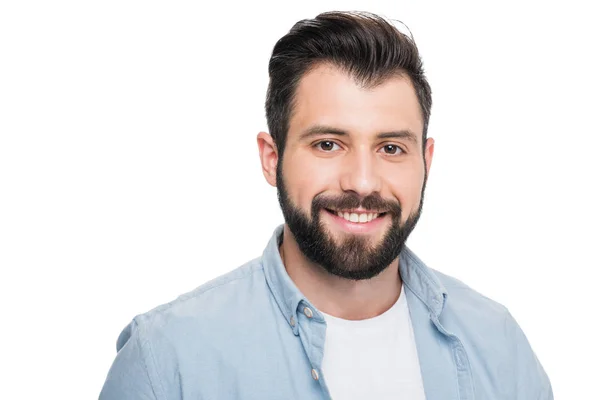

In [50]:
# Exemplo de como executar o prompt para validar formatação
print(prompt_template.invoke({"format_instructions": format_instructions}))


In [51]:
# Chain (organiza os módulos em uma cadeia de execução)
chain = prompt_template | llm | parser

# Pipeline de execução
response = chain.invoke({"format_instructions": format_instructions})

print(response)

{'faces': [{'gender': 'male', 'age': 30}], 'description': 'Homem jovem com barba e cabelo escuro, sorrindo. Ele veste uma camiseta branca e uma camisa azul clara aberta por cima. Fundo branco.'}


In [52]:
type(response)
response['faces']
response['description']

'Homem jovem com barba e cabelo escuro, sorrindo. Ele veste uma camiseta branca e uma camisa azul clara aberta por cima. Fundo branco.'

Poderíamos chamar os módulos individualmente, veja:

In [53]:
# Formatação do prompt
ex_formatted_prompt  = prompt_template.format_messages(
          format_instructions = format_instructions
        )

# Execução da LLM para gerar resposta
ex_response = llm.invoke(ex_formatted_prompt)

# Resposta
print(type(ex_response.content))

# Formatação da saída
ex_parsed_response = parser.parse(ex_response.content)

# Resposta formatada
print(type(ex_parsed_response))
print(ex_parsed_response)

<class 'str'>
<class 'dict'>
{'faces': [{'gender': 'male', 'age': 30}], 'description': 'Homem adulto com barba e cabelo escuro, sorrindo. Está vestindo uma camiseta branca com uma camisa azul clara por cima. O fundo é branco, simples e sem elementos adicionais.'}


Professor quero usar o **Gemini**, como faço?

É fácil, vejam:
```python
from langchain_google_vertexai import ChatVertexAI

llm = ChatVertexAI(
  model="gemini-1.5-pro",
  temperature=0
)

```

Basta trocar o "motor" de processamento e geração, ou seja, usem outro modelo de linguagem (LLM)!

Não dependemos mais de um framework individual de cada serviço de GenAI/LLM.

---

**Obs: não esqueçam que cada serviço tem a sua forma de se autenticar. Nesse caso vamos precisar configurar com api_key do Google!!!!**

---


###**2.3. LangChain com Azure + OpenAI (Azure AI Foundry | OpenAI)**

In [ ]:
#!pip install langchain==0.3.27 langchain-openai --quiet

In [54]:

subscription_key = "" # @param {"type":"string"}
azure_endpoint="" # @param {"type":"string"}
api_version="" # @param {"type":"string"}
deployment = "gpt-4.1"# @param {"type":"string"}


In [55]:
# Módulo do LangChain para OpenAI e Azure
from langchain_openai import AzureChatOpenAI

# Configuração do LLM
llm = AzureChatOpenAI(
    api_key = subscription_key,
    azure_endpoint = azure_endpoint,
    api_version = api_version,  # ex.: "2024-08-01-preview"
    azure_deployment = deployment,
    temperature = 0.5,
)

In [56]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Monta um template de prompt — mensagens estruturadas (system/human/ia)
prompt = ChatPromptTemplate.from_messages([
    ("system", "Você é um assistente técnico e objetivo."),
    ("human", "Explique o que é LangChain em 3 tópicos."),
])

# Parser — converte a resposta em string “limpa”
parser = StrOutputParser()

In [57]:
# Cadeia LCEL — prompt -> modelo -> parser
chain = prompt | llm | parser

# Execute a chain
response = chain.invoke({})

In [58]:
print(response)

1. **Framework para Aplicações com IA Generativa:**  
   LangChain é um framework de código aberto que facilita a criação de aplicações que utilizam modelos de linguagem (LLMs), como o ChatGPT, integrando-os com outras fontes de dados e funcionalidades.

2. **Integração e Orquestração de Componentes:**  
   Ele permite combinar diferentes componentes, como prompts, modelos de linguagem, fontes de dados externas (bancos de dados, APIs, documentos), e fluxos de trabalho, tornando mais fácil construir aplicações complexas com IA.

3. **Foco em Cadeias de Processamento (Chains):**  
   O LangChain organiza o processamento em "chains" (cadeias), onde a saída de um componente pode alimentar outro, possibilitando automação, consultas inteligentes e interações dinâmicas com dados.


##**3. Prática - Simulando um ChatBot**

Que tal criar um mini ChatBot para praticar um pouco mais com o que aprendemos até aqui e aumentar nosso nível de **Prompt Engineering**?

Observem como podemos montar um prompt mais estruturado:

###**3.1. Estrutura inicial do ChatBot**

In [55]:
#!pip install langchain==0.3.27 langchain-openai --quiet

In [59]:

subscription_key = "" # @param {"type":"string"}
azure_endpoint="" # @param {"type":"string"}
api_version="" # @param {"type":"string"}
deployment = "gpt-4.1"# @param {"type":"string"}


In [60]:
# Módulo do LangChain para OpenAI e Azure
from langchain_openai import AzureChatOpenAI

# Configuração do LLM
llm = AzureChatOpenAI(
    api_key = subscription_key,
    azure_endpoint = azure_endpoint,
    api_version = api_version,
    azure_deployment = deployment,
    temperature = 0.5,
)

In [61]:
# Exemplo estático sem histórico de conversa
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

# Criando o contexto fixo do chatbot
context = """
**Dados sobre o negócio da concessionária AutoToya Veículos**

## O que fazemos:
- Vendemos carros novos e seminovos.
- Oferecemos financiamento, seguro, consórcio e manutenção.
- Agendamos test-drive para os clientes.

## Unidades:
- Osasco: Avenida dos Autonomistas, 890 - Centro, Osasco - SP, 06020-010
- São Paulo: Avenida Paulista, 1106 - Bela Vista, São Paulo - SP, 01311-000
- Curitiba: Avenida Sete de Setembro, 2775 - Rebouças, Curitiba - PR, 80230-010

## Horário de funcionamento:
- Segunda a Sexta: 8h às 18h
- Sábado: 9h às 14h
- Domingo: fechado

## Tabela de preços:
| Veículo             | Preço (R$)  | Descrição                                                                    |
| ------------------- | ----------- | ---------------------------------------------------------------------------- |
| Fiat Argo 2024      | 78.900      | Seminovo, 12.000 km, cor vermelho, único dono, em excelente estado.          |
| Jeep Renegade 2024  | 134.900     | Novo, 0 km, cor branca, equipado com pacote completo, garantia de fábrica.   |
| Toyota Corolla 2024 | 152.500     | Seminovo, 8.500 km, cor preta, muito bem conservado, revisões em dia.        |
| Chevrolet Onix 2024 | 84.700      | Seminovo, 20.000 km, cor prata, pequenas marcas de uso, revisões realizadas. |

## Informações de contato:
- Telefone: (11) 4002-8922
- WhatsApp: (11) 98888-7777
- Site: www.autotoyaveiculos.com.br
- Instagram: contato@autotoyaveiculos.com.br
"""

# Criando o prompt principal para a LLM
template = """
**Você é um assistente virtual (chatbot) simpático e prestativo.**

#**Seu objetivo é:**
1. Responder dúvidas simples sobre a loja e os veículos.
2. Convidar o cliente para fazer um test-drive.
3. Ajudar a agendar uma visita para test-drive.

# Contexto:
{contexto}

Converse com o cliente com base no contexto acima.
Pergunta do cliente: {pergunta}
"""

prompt = PromptTemplate(template=template, input_variables=["contexto","pergunta"])

# Criando a chain
chain = LLMChain(llm=llm, prompt=prompt)

# Entrada do usuário
user_question = input("\nDigite sua pergunta: ")
response = chain.invoke({"contexto": context, "pergunta": user_question})
print(f"\nIA: {response['text']}")

/tmp/ipython-input-242209262.py:58: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=llm, prompt=prompt)



Digite sua pergunta: Quem é a AutoToya?

IA: Olá! 😊

A AutoToya Veículos é uma concessionária especializada na venda de carros novos e seminovos. Além disso, oferecemos serviços como financiamento, seguro, consórcio e manutenção para facilitar ainda mais a sua experiência. Temos unidades em Osasco, São Paulo e Curitiba, sempre prontas para te atender com qualidade e confiança!

Se quiser conhecer nossos veículos de perto, que tal agendar um test-drive? Posso te ajudar a marcar uma visita na unidade mais conveniente para você!


### **3.2. Simulando nosso CharBot**

Vamos transformar isso em um chat?

In [62]:
# Exemplo sem histórico de conversa
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

# Criando o contexto fixo do chatbot
contexto = """
**Dados sobre o negócio da concessionária AutoToya Veículos**

## O que fazemos:
- Vendemos carros novos e seminovos.
- Oferecemos financiamento, seguro, consórcio e manutenção.
- Agendamos test-drive para os clientes.

## Unidades:
- Osasco: Avenida dos Autonomistas, 890 - Centro, Osasco - SP, 06020-010
- São Paulo: Avenida Paulista, 1106 - Bela Vista, São Paulo - SP, 01311-000
- Curitiba: Avenida Sete de Setembro, 2775 - Rebouças, Curitiba - PR, 80230-010

## Horário de funcionamento:
- Segunda a Sexta: 8h às 18h
- Sábado: 9h às 14h
- Domingo: fechado

## Tabela de preços:
| Veículo             | Preço (R$)  | Descrição                                                                    |
| ------------------- | ----------- | ---------------------------------------------------------------------------- |
| Fiat Argo 2024      | 78.900      | Seminovo, 12.000 km, cor vermelho, único dono, em excelente estado.          |
| Jeep Renegade 2024  | 134.900     | Novo, 0 km, cor branca, equipado com pacote completo, garantia de fábrica.   |
| Toyota Corolla 2024 | 152.500     | Seminovo, 8.500 km, cor preta, muito bem conservado, revisões em dia.        |
| Chevrolet Onix 2024 | 84.700      | Seminovo, 20.000 km, cor prata, pequenas marcas de uso, revisões realizadas. |

## Informações de contato:
- Telefone: (11) 4002-8922
- WhatsApp: (11) 98888-7777
- Site: www.autotoyaveiculos.com.br
- Instagram: contato@autotoyaveiculos.com.br
"""

# Criando o prompt principal para a LLM
template = """
**Você é um assistente virtual (chatbot) da AutoToya Veículos**

#**Seu objetivo é:**
1. Responder dúvidas simples sobre a loja e os veículos.
2. Convidar o cliente para fazer um test-drive.
3. Ajudar a agendar uma visita para test-drive.

# Orientações de persona:
- Seu nome é ToyaBot.
- Seja simpático e prestativo. Use emojs para deixar a conversa divertida, como: 🤖 🚗 👊 💪 🚀 😊 🪄
- Nunca destratar um cliente sendo rude por exemplo.
- Responda **apenas** perguntas que estão no contexto, se não estiver, diga que não pode responder e volte para o contexto da conversa e objetivo.

# Contexto:
{contexto}

# Histórico da conversa:
{historico}

**Mantenha uma coerência nas respostas com base no histórico acima.**

Converse com o cliente com base no contexto e histórico acima.
Pergunta do cliente: {pergunta}
"""

prompt = PromptTemplate(template=template, input_variables=["contexto","pergunta"])

# Variável para armazenamos a conversa
historico = """
IA: Olá! Sou um assistente virtual, me chamo ToyaBot 🤖. Como posso ajudar?
"""

# Loop para gerar simular o chatbot
print("Iniciado o Chatbot da AutoToya Veículos! Digite 'sair' para encerrar.\n")
print(historico)
while True:
    pergunta = input("\nDigite sua pergunta: ")
    if pergunta.lower() == "sair":
        print("Conversa encerrada. Até logo! 🚗")
        break

    # Chamada ao modelo
    resposta = chain.invoke({
        "contexto": contexto,
        "historico": historico,
        "pergunta": pergunta
    })

    resposta_ia = resposta['text']
    print(f"\nIA: {resposta_ia}")

    # Atualiza histórico manualmente
    historico += f"\nHuman: {pergunta}\nIA: {resposta_ia}\n"

Iniciado o Chatbot da AutoToya Veículos! Digite 'sair' para encerrar.


IA: Olá! Sou um assistente virtual, me chamo ToyaBot 🤖. Como posso ajudar?


Digite sua pergunta: Olá, boa tarde. Gostaria de conhecer as opções de veículos disponíveis.

IA: Olá, boa tarde! 😊 Será um prazer te ajudar a conhecer nossas opções de veículos.

Hoje temos os seguintes modelos disponíveis:

- **Fiat Argo 2024**  
  Seminovo, 12.000 km, cor vermelho, único dono, em excelente estado.  
  **Preço:** R$ 78.900

- **Jeep Renegade 2024**  
  Novo, 0 km, cor branca, equipado com pacote completo, garantia de fábrica.  
  **Preço:** R$ 134.900

- **Toyota Corolla 2024**  
  Seminovo, 8.500 km, cor preta, muito bem conservado, revisões em dia.  
  **Preço:** R$ 152.500

- **Chevrolet Onix 2024**  
  Seminovo, 20.000 km, cor prata, pequenas marcas de uso, revisões realizadas.  
  **Preço:** R$ 84.700

Se quiser conhecer algum deles de perto, posso agendar um test-drive para você em uma de nossas unidades (Osasco, S

## **EXTRA - Plataforma da Azure + OpenAI - Azure AI Foundry | OpenAI**

Exemplo de como usar o serviço da OpenAI via Azure OpenAI.

- [Documentação Azure AI Foundry](https://learn.microsoft.com/pt-br/azure/ai-foundry/what-is-azure-ai-foundry)
- [Repositório da OpenAI](https://github.com/openai/openai-python?tab=readme-ov-file#microsoft-azure-openai)

In [63]:

subscription_key = "" # @param {"type":"string"}
azure_endpoint="" # @param {"type":"string"}
api_version="" # @param {"type":"string"}
deployment = "gpt-4.1"# @param {"type":"string"}


In [64]:
from openai import AzureOpenAI

client = AzureOpenAI(
    # https://learn.microsoft.com/azure/ai-services/openai/reference#rest-api-versioning
    api_version = api_version,
    # https://learn.microsoft.com/azure/cognitive-services/openai/how-to/create-resource?pivots=web-portal#create-a-resource
    azure_endpoint = azure_endpoint,
    # gets the API Key from environment variable AZURE_OPENAI_API_KEY
    api_key = subscription_key,
)

Exemplo com geração de texto:

In [65]:
completion = client.chat.completions.create(
    model = deployment,
    messages = [
        {
            "role": "user",
            "content": "Quem é a OpenAI? resposta breve.",
        },
    ],
)
print(completion.to_json())

{
  "id": "chatcmpl-CB49VehQahcZGmaleEz3ge9j0yFym",
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "A OpenAI é uma empresa de inteligência artificial que desenvolve tecnologias avançadas, como o ChatGPT.",
        "refusal": null,
        "role": "assistant",
        "annotations": []
      },
      "content_filter_results": {
        "hate": {
          "filtered": false,
          "severity": "safe"
        },
        "self_harm": {
          "filtered": false,
          "severity": "safe"
        },
        "sexual": {
          "filtered": false,
          "severity": "safe"
        },
        "violence": {
          "filtered": false,
          "severity": "safe"
        }
      }
    }
  ],
  "created": 1756753605,
  "model": "gpt-4.1-2025-04-14",
  "object": "chat.completion",
  "system_fingerprint": "fp_c79ab13e31",
  "usage": {
    "completion_tokens": 22,
    "prompt_tokens": 16,
    "total_t

In [66]:
import json

print(json.loads(completion.to_json())["choices"][0]['message']['content'])

A OpenAI é uma empresa de inteligência artificial que desenvolve tecnologias avançadas, como o ChatGPT.


Exemplo com análise de imagem:

In [67]:
import os
import base64
from PIL import Image
from google.colab import files

In [68]:
def resized_img(file_name: str) -> str:
    """ Função para redimensionar imagens grandes
    """
    img = Image.open(file_name)
    width, height = img.size
    if width <= 600 or height <= 400:
        return file_name

    resized_img = img.resize((600, 400))
    file_name_output = "resized_" + file_name
    resized_img.save(file_name_output)
    print(f"Image resized to 600x400 and saved as '{file_name_output}'")
    return file_name_output

Saving imagem2-homem.jpg to imagem2-homem (1).jpg
Arquivo recebido "imagem2-homem (1).jpg" com 13626 bytes
Arquivo redimensionado "imagem2-homem (1).jpg"


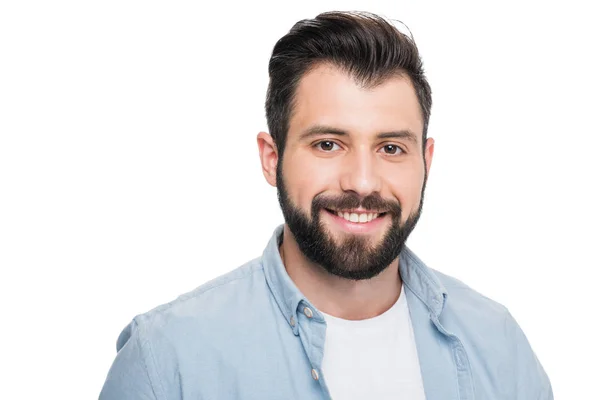

In [66]:
# Célula para fazer Upload de um arquivo de imagem
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'Arquivo recebido "{fn}" com {len(uploaded[fn])} bytes')
  file_resized = resized_img(fn)
  print(f'Arquivo redimensionado "{file_resized}"')

with Image.open(file_resized) as img:
  display(img)

In [69]:
# Converte a imagem para Base64
IMAGE_PATH = file_resized
encoded_image = base64.b64encode(open(IMAGE_PATH, 'rb').read()).decode('ascii')
encoded_image

'UklGRjI1AABXRUJQVlA4ICY1AABQAQGdASpYApABPlEokEYjoqGko/MJWJAKCWduvnXuJXIFPnjI3PtF7mvF8v7lGjgP3Pc+n/caear9pvVO9P39l37j0AOmJn5XT39Rlg+LupN4F51/8vwl4Cj3P31mTX//5HnD4gvmV/5fFB/J+oV5Rv/L5Xf271EumSMymIBARbmACAhJamtg25DuzUCqLjHT3ZuGxh1fA+Pb5gw8AgItzABARbmACAi3L/hKP/ZFJ1auV2RHSezbxIByjO9eZshgPopwXg5eL+CoTAkkQRVRyoBz86CEXtDZ/Os0SFMAEBFuYAICLcv9ojD/PDhTdhlvAYZsc3r86Gz1DCsKThhhB8rl1acFutSs7M01VOQyMOCt2BeLiSPy1dV5cByEE6t76pQtzABARbmACAi3MAD0oKr9IzStpVmnLgKOsf/Fn8W/biqO+5fOwtPfdjowOj5SG9HVLQPec4IwACmaSOjorpmsuCcKQEvggybaS+wytzABARbmACAi3MAD0YlGX0sMza/MmE3KU9X+uSiAuW9Up5wHH7INXx5A3T/NlfXaIeK06d9IApkIm0/PZZtMzyfyRd6IfqLrRE0BC/hF2Z4CLcwAQEW5gAgB23e4R/0uBFLpAJ7OiUXSBzoDNBLdJ2lMSzOOF1zgQpM4X5daGxopgEHUwUHXI7c+MiMat3Zbq29GwtzABARbmACAi3L/ZdcLYh4GEng+QFZYQKNuLOh0vdxWBp5V8kbW8moDtS4YEw6vnlyes6K/hlBLu4vQpgAgItzABARbmAAi0i16gveYgHiwS+4uEn1TLFnLd2N+XnCyqCB9osJ9NLobEgdYLVYjQzoXH+D9W4I3x4+cQEW5gAgItzABARbkhWZV5YcraSKunOxZPLbi/JYny0RgUCK+zjOzx2zOCvmc1p/1JzcnjGjl8uhFDKMthuc8q8bc1PBjkG31xxILrhvcOzRIUwAQEW5gAgAZSki

In [70]:
from openai import AzureOpenAI

client = AzureOpenAI(
    # https://learn.microsoft.com/azure/ai-services/openai/reference#rest-api-versioning
    api_version = api_version,
    # https://learn.microsoft.com/azure/cognitive-services/openai/how-to/create-resource?pivots=web-portal#create-a-resource
    azure_endpoint = azure_endpoint,
    # gets the API Key from environment variable AZURE_OPENAI_API_KEY
    api_key = subscription_key,
)

In [71]:
prompt =  [
            {
              "role": "system",
              "content": [
                {
                  "type": "text",
                  "text": """Analise a imagem e descreva o conteúdo da imagem conforme o formato em JSON solicitado.
                             Deve conter as tags 'gender' e 'age' (em anos) para cada pessoa presente na imagem.
                             EXEMPLO DE RESPOSTA {"faces":[{"gender":"male/female", "age": 50}], "description": "Descrição geral da pessoa ou da imagem."}
                             Não adicione explicações, responda **apenas** com o JSON. """
                }
              ]
            },
            {
              "role": "user",
              "content": [
                {
                  "type": "image_url",
                  "image_url": {
                    "url": f"data:image/jpeg;base64,{encoded_image}"
                  }
                }
              ]
            }
          ]

In [72]:
completion = client.chat.completions.create(
    model = deployment,
    messages = prompt,
)
print(completion.to_json())

{
  "id": "chatcmpl-CB49pTonlGJO8VlNJ9jlkWzU0pGJ1",
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "{\"faces\":[{\"gender\":\"male\", \"age\": 30}], \"description\": \"Homem usando camiseta branca e camisa azul clara, cabelo castanho escuro penteado para trás. O fundo é branco e o rosto está desfocado.\"}",
        "refusal": null,
        "role": "assistant",
        "annotations": []
      },
      "content_filter_results": {
        "hate": {
          "filtered": false,
          "severity": "safe"
        },
        "self_harm": {
          "filtered": false,
          "severity": "safe"
        },
        "sexual": {
          "filtered": false,
          "severity": "safe"
        },
        "violence": {
          "filtered": false,
          "severity": "safe"
        }
      }
    }
  ],
  "created": 1756753625,
  "model": "gpt-4.1-2025-04-14",
  "object": "chat.completion",
  "system_fingerp

In [73]:
import json

print(json.loads(completion.to_json())["choices"][0]['message']['content'])

{"faces":[{"gender":"male", "age": 30}], "description": "Homem usando camiseta branca e camisa azul clara, cabelo castanho escuro penteado para trás. O fundo é branco e o rosto está desfocado."}


In [74]:
respose = json.loads(json.loads(completion.to_json())["choices"][0]['message']['content'])
type(respose)
respose

{'faces': [{'gender': 'male', 'age': 30}],
 'description': 'Homem usando camiseta branca e camisa azul clara, cabelo castanho escuro penteado para trás. O fundo é branco e o rosto está desfocado.'}